# 1.Setup and load data

## 1.1 Install independencies and setup

In [1]:
#!pip install tensorflow opencv-python matplotlib

In [2]:
#!pip list

In [3]:
import tensorflow as tf
import os

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

## 1.2 Remove dodgy images

In [7]:
import cv2
import imghdr

C:\Users\lasso\AppData\Local\Temp\ipykernel_12876\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'C:/Users/lasso/Desktop/Lasso/4.2/Project II/ML_trials/ImageClassification-main/data'

In [9]:
image_ext = 'jpeg', 'jpg', 'bmp', 'png'

In [10]:
image_ext

('jpeg', 'jpg', 'bmp', 'png')

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            image = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

## 1.3 Load data

In [12]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 302 files belonging to 2 classes.


In [15]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000027F95B21F70>)

In [18]:
#get another batch from the iterator
batch = data_iterator.next()

In [19]:
len(batch)

2

In [ ]:
batch[0]

In [20]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [21]:
#class 1 = sad people
#class o = happy people
batch[1]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1])

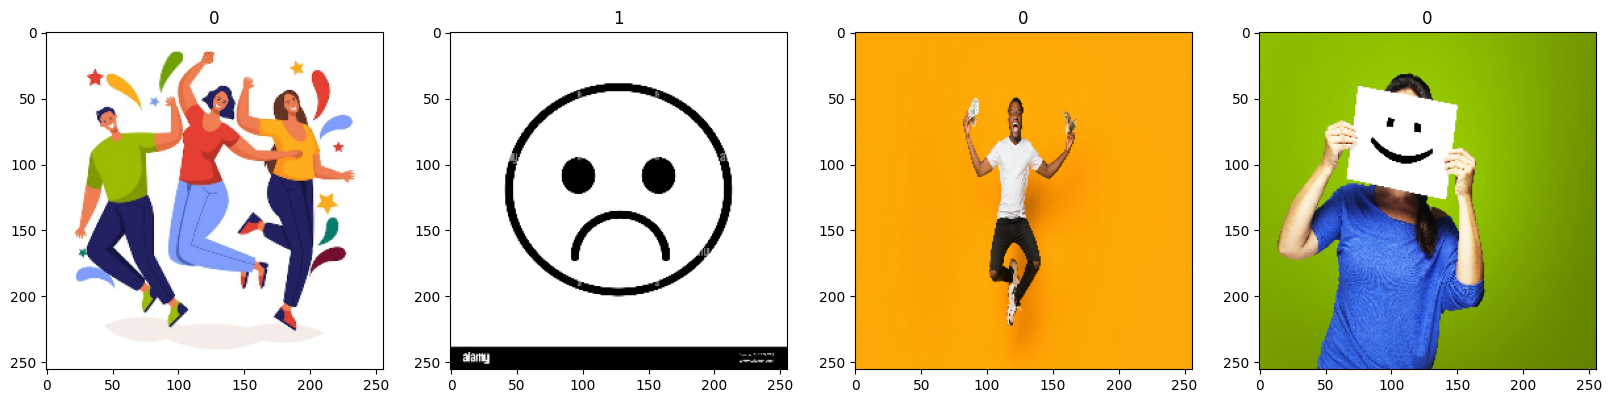

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
scaled = batch[0] /255

In [24]:
scaled.max()

1.0

# 2. Preprocess Data

## 2.1  Scale Data

In [25]:
data = data.map(lambda x, y: (x/255, y))

In [26]:
data.as_numpy_iterator()

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000027F97B17EF0>)

In [27]:
stu = data.as_numpy_iterator()

In [28]:
batch = data.as_numpy_iterator().next()

In [29]:
batch[0].min()

0.0

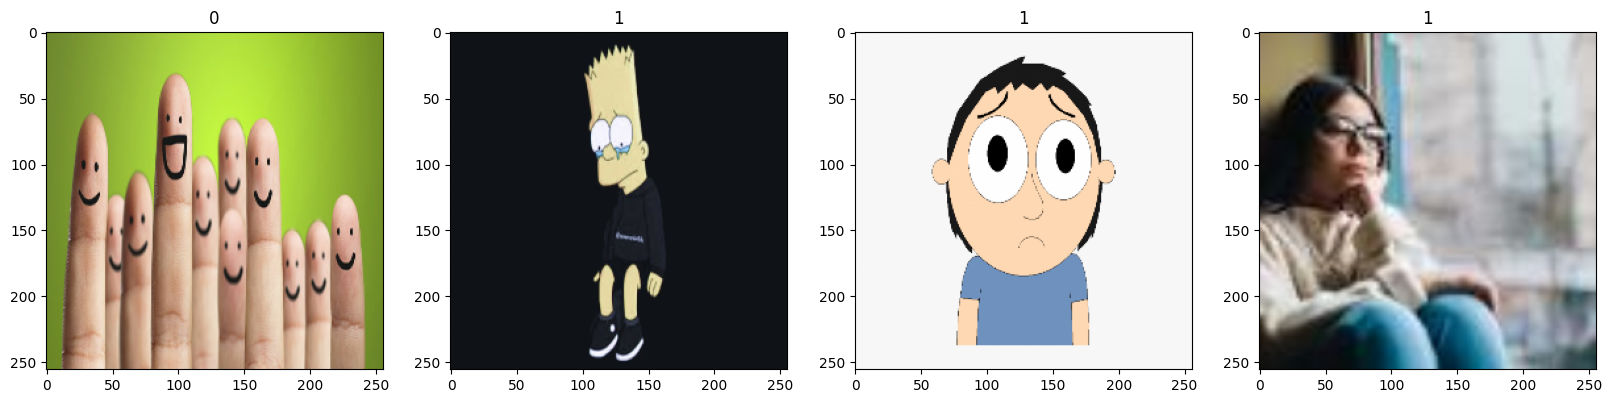

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split data

In [31]:
len(data)

10

In [32]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [33]:
train= data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
len(test)

1

# 3. Deep model

## 3.1 Build Deep learning model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1,activation ='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


C:\Users\lasso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [40]:
logdir = 'logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.4695 - loss: 1.4168 - val_accuracy: 0.6094 - val_loss: 0.6564
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 412ms/step - accuracy: 0.5211 - loss: 0.7105 - val_accuracy: 0.7500 - val_loss: 0.6214
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 422ms/step - accuracy: 0.7031 - loss: 0.5817 - val_accuracy: 0.7500 - val_loss: 0.5059
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 423ms/step - accuracy: 0.7184 - loss: 0.5490 - val_accuracy: 0.6875 - val_loss: 0.5222
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.7423 - loss: 0.5727 - val_accuracy: 0.8594 - val_loss: 0.3691
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 427ms/step - accuracy: 0.8041 - loss: 0.4283 - val_accuracy: 0.8438 - val_loss: 0.3402
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 447ms/step - accuracy: 0.8695 - loss: 0.3614 - val_accuracy: 0.9375 - val_loss: 0.2506
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 433ms/step - accuracy: 0.8770 - loss: 0.3187 - val_accuracy: 0.9375 - val_loss:

In [43]:
hist.history

{'accuracy': [0.5178571343421936,
  0.6160714030265808,
  0.7276785969734192,
  0.71875,
  0.8169642686843872,
  0.8035714030265808,
  0.9017857313156128,
  0.8616071343421936,
  0.9241071343421936,
  0.9285714030265808,
  0.9821428656578064,
  0.9732142686843872,
  0.9508928656578064,
  0.9642857313156128,
  0.9821428656578064,
  0.9821428656578064,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.2380520105361938,
  0.6705442070960999,
  0.5664491653442383,
  0.5502572059631348,
  0.4949052631855011,
  0.44226378202438354,
  0.336518794298172,
  0.3271014094352722,
  0.22900032997131348,
  0.17150425910949707,
  0.12356551736593246,
  0.09463048726320267,
  0.14218021929264069,
  0.09778725355863571,
  0.07093293964862823,
  0.054638396948575974,
  0.025843674317002296,
  0.014721168205142021,
  0.010039122775197029,
  0.006689968053251505],
 'val_accuracy': [0.609375,
  0.75,
  0.75,
  0.6875,
  0.859375,
  0.84375,
  0.9375,
  0.9375,
  0.953125,
  0.96875,
  0.96875,
  0.984375,
  1.0,
  

## 3.3 Plot perfomance

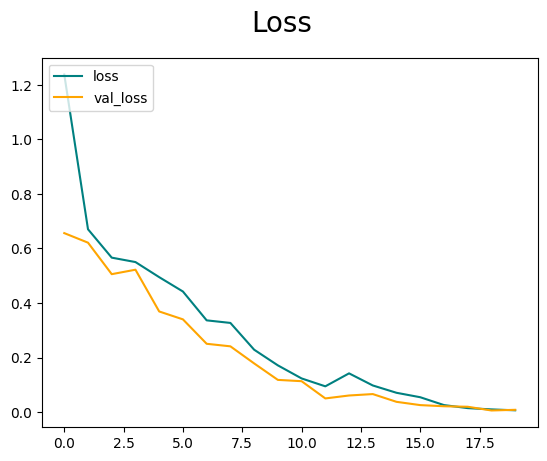

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

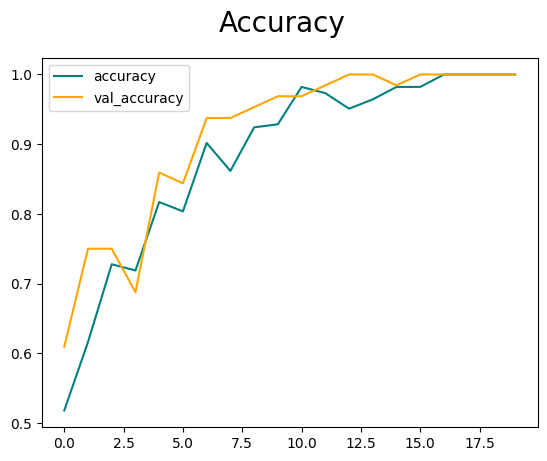

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate perfomave

## 4.1 Evaluate

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
len(test)

1

In [49]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [50]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## 4.2 Test

In [51]:
import cv2

<function matplotlib.pyplot.show(close=None, block=None)>

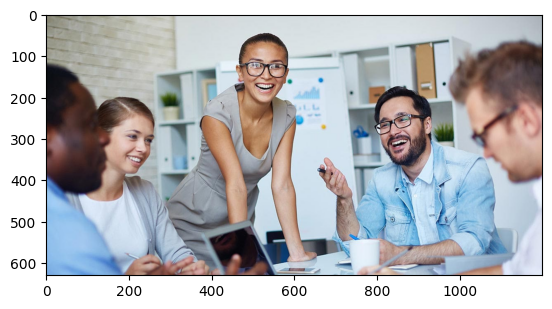

In [103]:
img = cv2.imread('happy_2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

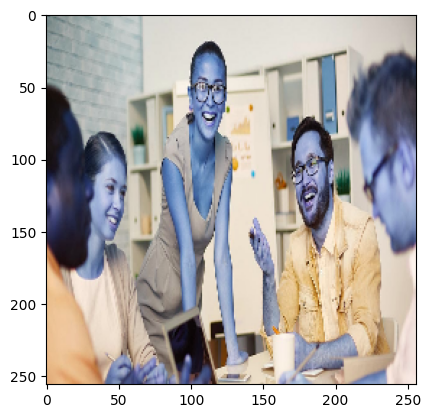

In [104]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [108]:
#resize.shape

In [109]:
#np.expand_dims(resize, 0).shape

In [105]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [106]:
yhat

array([[0.00336027]], dtype=float32)

In [107]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 5.Save the model

## 5.1 Save the model

In [110]:
from tensorflow.keras.models import load_model

In [111]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [112]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [113]:
new_model

<Sequential name=sequential, built=True>

In [115]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [116]:
if yhat_new > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
